## 1. Load the Dataset
Goal: Ensure the dataset is loaded correctly and the structure matches expectations.

In [1]:
import pandas as pd

# Load dataset
data = pd.read_csv('dataset_NYC.txt', sep='\t', header=None, encoding='ISO-8859-1')

# Assign meaningful column names
data.columns = ['User_ID', 'Venue_ID', 'Venue_Category_ID', 'Venue_Category_Name', 'Latitude', 'Longitude', 'Timezone_Offset', 'UTC_Time']

# Display the first few rows to understand the structure
print(data.head())

   User_ID                  Venue_ID         Venue_Category_ID  \
0      470  49bbd6c0f964a520f4531fe3  4bf58dd8d48988d127951735   
1      979  4a43c0aef964a520c6a61fe3  4bf58dd8d48988d1df941735   
2       69  4c5cc7b485a1e21e00d35711  4bf58dd8d48988d103941735   
3      395  4bc7086715a7ef3bef9878da  4bf58dd8d48988d104941735   
4       87  4cf2c5321d18a143951b5cec  4bf58dd8d48988d1cb941735   

   Venue_Category_Name   Latitude  Longitude  Timezone_Offset  \
0  Arts & Crafts Store  40.719810 -74.002581             -240   
1               Bridge  40.606800 -74.044170             -240   
2       Home (private)  40.716162 -73.883070             -240   
3       Medical Center  40.745164 -73.982519             -240   
4           Food Truck  40.740104 -73.989658             -240   

                         UTC_Time  
0  Tue Apr 03 18:00:09 +0000 2012  
1  Tue Apr 03 18:00:25 +0000 2012  
2  Tue Apr 03 18:02:24 +0000 2012  
3  Tue Apr 03 18:02:41 +0000 2012  
4  Tue Apr 03 18:03:00 +0000 201

## 2. Basic Dataset Statistics
Analyze the number of unique users, venues, and categories.

### a) General overview:

In [2]:
# Check the size of the dataset (rows, columns)
print("Dataset shape:", data.shape)

# Count unique users, venues, and categories
unique_users = data['User_ID'].nunique()
unique_venues = data['Venue_ID'].nunique()
unique_categories = data['Venue_Category_Name'].nunique()

print("Number of unique users:", unique_users)
print("Number of unique venues:", unique_venues)
print("Number of unique categories:", unique_categories)

Dataset shape: (227428, 8)
Number of unique users: 1083
Number of unique venues: 38333
Number of unique categories: 251


### b) Popular categories:

In [3]:
# Find the most popular venue categories
popular_categories = data['Venue_Category_Name'].value_counts().head(5)
print("Top 5 categories:\n", popular_categories)

Top 5 categories:
 Venue_Category_Name
Bar                     15978
Home (private)          15382
Office                  12740
Subway                   9348
Gym / Fitness Center     9171
Name: count, dtype: int64


## 3. Handle Missing Data
Check if there are any missing values in the dataset.
- If there are missing values:
   - For numeric fields, fill missing values with the mean or median.
   - For categorical fields, use the most frequent value (mode).

## 4. Remove Duplicates
Ensure there are no duplicate rows in the dataset.

In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 User_ID                0
Venue_ID               0
Venue_Category_ID      0
Venue_Category_Name    0
Latitude               0
Longitude              0
Timezone_Offset        0
UTC_Time               0
dtype: int64


In [5]:
# Drop duplicate rows
data = data.drop_duplicates()
print("Dataset shape after removing duplicates:", data.shape)

Dataset shape after removing duplicates: (227178, 8)


## 5. Time-Based Analysis
Use the UTC_Time column to analyze check-in times.

### a) Convert UTC_Time to datetime:

In [19]:
# Convert UTC_Time to datetime format
data['UTC_Time'] = pd.to_datetime(data['UTC_Time'], errors='coerce')

# Check if all rows were successfully converted
print("Number of invalid datetime entries:", data['UTC_Time'].isnull().sum())


Number of invalid datetime entries: 0


### b) User activity by hour:

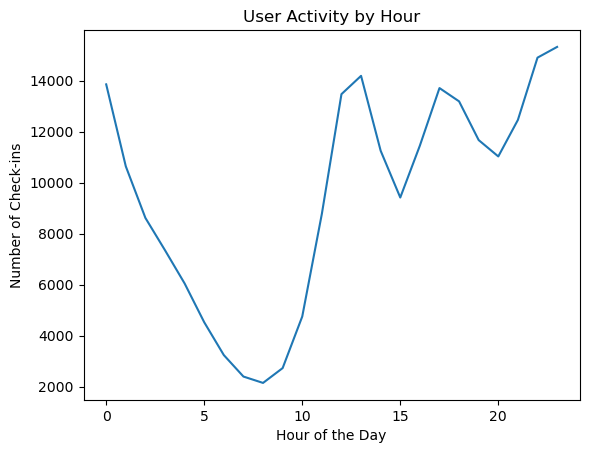

In [7]:
# Extract the hour of the day
data['Hour'] = data['UTC_Time'].dt.hour

# Count check-ins for each hour
hourly_activity = data['Hour'].value_counts().sort_index()

# Plot hourly activity
import matplotlib.pyplot as plt

plt.plot(hourly_activity.index, hourly_activity.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Check-ins')
plt.title('User Activity by Hour')
plt.show()

## 6. Geographical Analysis
Use the Latitude and Longitude columns to analyze the distribution of venues.

### a) Visualize check-ins on a map:

In [18]:
import folium

# Sample: Use the first 10 rows only to generate a simple map
sample_data = data.head(10)

# Create a map
center_lat = sample_data['Latitude'].mean()
center_lon = sample_data['Longitude'].mean()
map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add points
for _, row in sample_data.iterrows():
    folium.Marker(location=[row['Latitude'], row['Longitude']],
                  popup=row['Venue_Category_Name']).add_to(map)

# Save map
map.save("venues_map_sample.html")

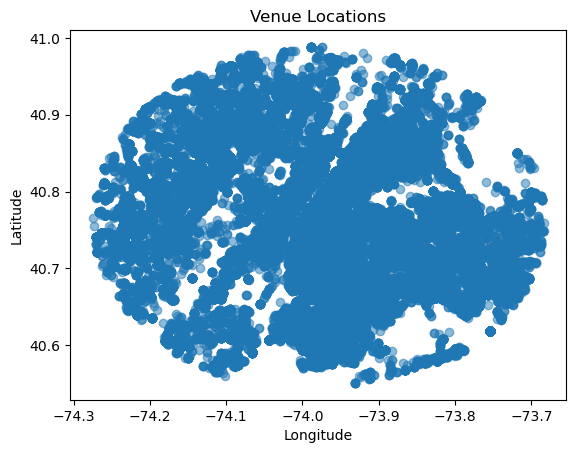

In [22]:
import matplotlib.pyplot as plt

# Scatter plot of locations
plt.scatter(data['Longitude'], data['Latitude'], alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Venue Locations')
plt.show()

### b) Average coordinates per category:

In [20]:
# Calculate average coordinates for each category
category_locations = data.groupby('Venue_Category_Name')[['Latitude', 'Longitude']].mean()
print(category_locations.head())

                      Latitude  Longitude
Venue_Category_Name                      
Afghan Restaurant    40.749950 -73.986483
African Restaurant   40.727491 -73.899800
Airport              40.695451 -73.885782
American Restaurant  40.759401 -73.990330
Animal Shelter       40.771638 -73.942688


## 7. User Behavior Analysis
### a) Most active users:

In [10]:
# Find the top 10 most active users
top_users = data['User_ID'].value_counts().head(10)
print("Top 10 active users:\n", top_users)

Top 10 active users:
 User_ID
293    2693
185    2078
354    2061
315    1672
84     1374
349    1369
384    1115
974    1105
768    1095
445     951
Name: count, dtype: int64


### b) Number of categories visited by each user:

In [11]:
# Count the number of unique categories visited per user
categories_per_user = data.groupby('User_ID')['Venue_Category_Name'].nunique()
print(categories_per_user.describe())

count    1083.000000
mean       40.276085
std        13.979403
min         4.000000
25%        31.000000
50%        39.000000
75%        49.000000
max       139.000000
Name: Venue_Category_Name, dtype: float64


### c) Category preferences over time:
Analyze when specific categories are most popular:

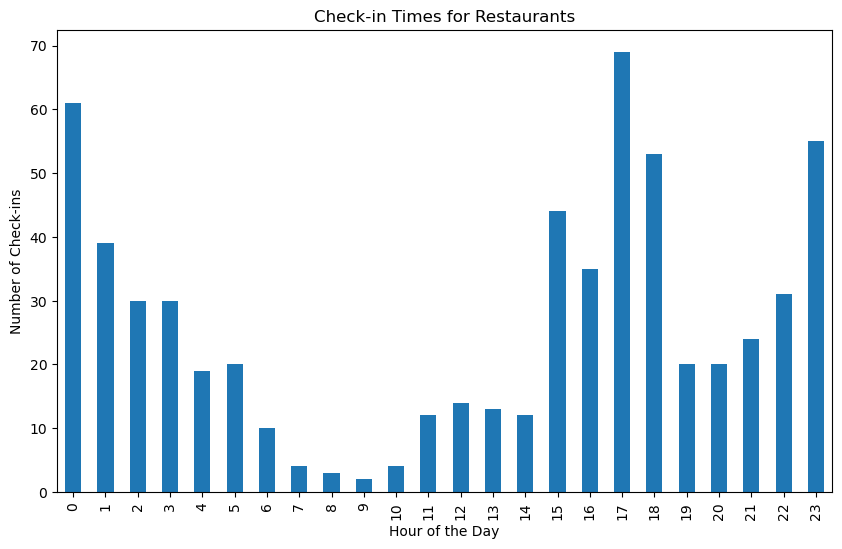

In [21]:
# Group by category and hour
category_time = data.groupby(['Venue_Category_Name', 'Hour']).size().unstack(fill_value=0)

# Example: Analyze activity for "Restaurant"
category_time.loc['Restaurant'].plot(kind='bar', figsize=(10, 6))
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Check-ins')
plt.title('Check-in Times for Restaurants')
plt.show()